In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head()
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = df[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


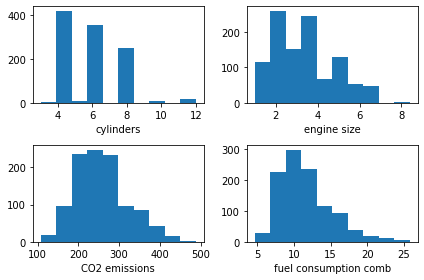

In [6]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
# viz.hist()
fig, axs = plt.subplots(2, 2, tight_layout=True)
plt.subplot(221)
plt.hist(cdf['CYLINDERS'])
plt.xlabel('cylinders')
plt.subplot(222)
plt.hist(cdf['ENGINESIZE'])
plt.xlabel('engine size')
plt.subplot(223)
plt.hist(cdf['CO2EMISSIONS'])
plt.xlabel('CO2 emissions')
plt.subplot(224)
plt.hist(cdf['FUELCONSUMPTION_COMB'])
plt.xlabel('fuel consumption comb')
plt.show()

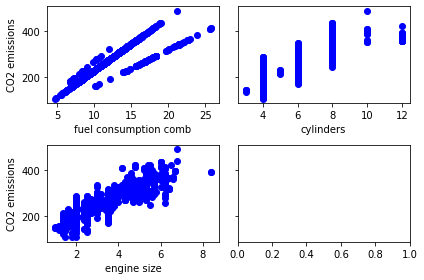

In [7]:
figure, axs = plt.subplots(2, 2, tight_layout=True, sharey=True)
plt.subplot(221)
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('fuel consumption comb')
plt.ylabel('CO2 emissions')
plt.subplot(222)
plt.scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('cylinders')
# plt.ylabel('CO2 emissions')
plt.subplot(223)
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('engine size')
plt.ylabel('CO2 emissions')
plt.show()

In [9]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

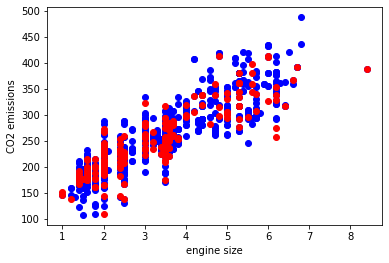

In [10]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'], color='red')
plt.xlabel('engine size')
plt.ylabel('CO2 emissions')
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
a = regr.coef_[0][0]
b = regr.intercept_[0]
print("coefficients: ", regr.coef_)
print("intercept: ", regr.intercept_)

coefficients:  [[39.56563225]]
intercept:  [124.10078379]


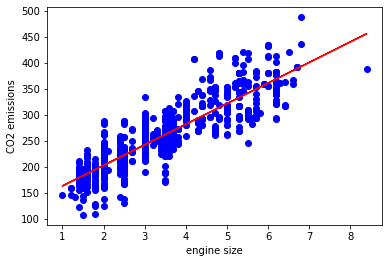

In [13]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
# plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'], color='yellow')
plt.plot(train_x, a*train_x + b, color='red')
plt.xlabel('engine size')
plt.ylabel('CO2 emissions')
plt.show()

In [16]:
from sklearn.metrics import r2_score
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
eval_y = regr.predict(test_x)

print("mean absolute error is: %.2f" % np.mean(np.absolute(eval_y - test_y)))
print("residual sum of squares: %.2f" % np.mean((eval_y - test_y)**2))
print("R2_score: %.2f" % r2_score(test_y, eval_y))

mean absolute error is: 23.04
residual sum of squares: 969.74
R2_score: 0.75


c:\Users\Farna\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
